# DS3 Workshop - Introduction to Machine Learning
### Yash Potdar

Welcome to our Introduction to ML Workshop, which is on February 2, 2021 from 6-7 PM PST. We'd love to see you at our workshop!

Here, you can follow along and learn some machine learning. Have fun!

The dataset we will be using is called [“Pokemon Legendary Data”](https://www.kaggle.com/kingabzpro/pokmon-legendary-data) from Kaggle. For your convenience, we have downloaded it into the same repository as this Jupyter Notebook for you.

**Note:** The slideshow presentation will be published after the workshop. This will allow you to look back at the material covered and go over concepts that we were not able to get to during the timeframe.

In [1]:
# Packages for dealing with data and graphing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cleaning
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

# For selecting train and test data
from sklearn.model_selection import train_test_split

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# Metrics on algorithms
from sklearn import metrics

In [2]:
pokedex = pd.read_csv('pokedex.csv', index_col = 'pokedex_number')
pokedex

,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,,,
1,Bulbasaur,49,49,0.7,45,88.1,65,65,45,grass,6.9,1,0
2,Ivysaur,62,63,1.0,60,88.1,80,80,60,grass,13.0,1,0
3,Venusaur,100,123,2.0,80,88.1,122,120,80,grass,100.0,1,0
4,Charmander,52,43,0.6,39,88.1,60,50,65,fire,8.5,1,0
5,Charmeleon,64,58,1.1,58,88.1,80,65,80,fire,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,Celesteela,101,103,9.2,97,NaN,107,101,61,steel,999.9,7,1
798,Kartana,181,131,0.3,59,NaN,59,31,109,grass,0.1,7,1
799,Guzzlord,101,53,5.5,223,NaN,97,53,43,dark,888.0,7,1


In [3]:
pokedex_drop = pokedex.dropna(axis=0, how='any')
pokedex_drop.shape

(684, 13)

In [4]:
pokedex_drop.groupby('is_legendary').count()

,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation
is_legendary,,,,,,,,,,,,
0,677,677,677,677,677,677,677,677,677,677,677,677
1,7,7,7,7,7,7,7,7,7,7,7,7


### Data Imputation (Filling in missing values)

In [5]:
# Create SimpleImputer object which fills NaN values with the mean of the column (this is naive, but simple)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fitting the imputer on the numerical portion of the dataframe
numerical_data = pokedex[['attack', 'defense', 'height_m', 'hp', 'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'generation', 'is_legendary']]
imp.fit(numerical_data)

# Transforming the dataset
imp.transform(numerical_data)

array([[4.90e+01, 4.90e+01, 7.00e-01, ..., 6.90e+00, 1.00e+00, 0.00e+00],
       [6.20e+01, 6.30e+01, 1.00e+00, ..., 1.30e+01, 1.00e+00, 0.00e+00],
       [1.00e+02, 1.23e+02, 2.00e+00, ..., 1.00e+02, 1.00e+00, 0.00e+00],
       ...,
       [1.01e+02, 5.30e+01, 5.50e+00, ..., 8.88e+02, 7.00e+00, 1.00e+00],
       [1.07e+02, 1.01e+02, 2.40e+00, ..., 2.30e+02, 7.00e+00, 1.00e+00],
       [9.50e+01, 1.15e+02, 1.00e+00, ..., 8.05e+01, 7.00e+00, 1.00e+00]])

In [6]:
# Temporary dataframe for transferring data
df = pd.DataFrame(imp.transform(numerical_data))
df

,0,1,2,3,4,5,6,7,8,9,10
0,49.0,49.0,0.7,45.0,88.100000,65.0,65.0,45.0,6.9,1.0,0.0
1,62.0,63.0,1.0,60.0,88.100000,80.0,80.0,60.0,13.0,1.0,0.0
2,100.0,123.0,2.0,80.0,88.100000,122.0,120.0,80.0,100.0,1.0,0.0
3,52.0,43.0,0.6,39.0,88.100000,60.0,50.0,65.0,8.5,1.0,0.0
4,64.0,58.0,1.1,58.0,88.100000,80.0,65.0,80.0,19.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
796,101.0,103.0,9.2,97.0,55.155761,107.0,101.0,61.0,999.9,7.0,1.0
797,181.0,131.0,0.3,59.0,55.155761,59.0,31.0,109.0,0.1,7.0,1.0
798,101.0,53.0,5.5,223.0,55.155761,97.0,53.0,43.0,888.0,7.0,1.0
799,107.0,101.0,2.4,97.0,55.155761,127.0,89.0,79.0,230.0,7.0,1.0


In [7]:
# Overwriting pokedex with all the imputed data. We use to_numpy() because the indices are shifted by 1
pokedex = pokedex.assign(attack = df[0].to_numpy(), defense = df[1].to_numpy(), height_m = df[2].to_numpy(), 
               hp = df[3].to_numpy(), percentage_male = df[4].to_numpy(), sp_attack = df[5].to_numpy(),
              sp_defense = df[6].to_numpy(), speed = df[7].to_numpy(), weight_kg = df[8].to_numpy(),
              generation = df[9].to_numpy(), is_legendary = df[10].to_numpy())
pokedex

,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,,,
1,Bulbasaur,49.0,49.0,0.7,45.0,88.100000,65.0,65.0,45.0,grass,6.9,1.0,0.0
2,Ivysaur,62.0,63.0,1.0,60.0,88.100000,80.0,80.0,60.0,grass,13.0,1.0,0.0
3,Venusaur,100.0,123.0,2.0,80.0,88.100000,122.0,120.0,80.0,grass,100.0,1.0,0.0
4,Charmander,52.0,43.0,0.6,39.0,88.100000,60.0,50.0,65.0,fire,8.5,1.0,0.0
5,Charmeleon,64.0,58.0,1.1,58.0,88.100000,80.0,65.0,80.0,fire,19.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,Celesteela,101.0,103.0,9.2,97.0,55.155761,107.0,101.0,61.0,steel,999.9,7.0,1.0
798,Kartana,181.0,131.0,0.3,59.0,55.155761,59.0,31.0,109.0,grass,0.1,7.0,1.0
799,Guzzlord,101.0,53.0,5.5,223.0,55.155761,97.0,53.0,43.0,dark,888.0,7.0,1.0


# Naive Bayes
### Predicting Pokemon Type

In [8]:
# Creating a LabelEncoder object
encoder = preprocessing.LabelEncoder()

# Converting categorical values into numerical data (encoding)
type_encoded = encoder.fit_transform(pokedex['type'])
type_encoded

array([ 9,  9,  9,  6,  6,  6, 17, 17, 17,  0,  0,  0,  0,  0,  0, 12, 12,
       12, 12, 12, 12, 12, 13, 13,  3,  3, 10, 10, 13, 13, 13, 13, 13, 13,
        4,  4,  6,  6, 12, 12, 13, 13,  9,  9,  9,  0,  0,  0,  0, 10, 10,
       12, 12, 17, 17,  5,  5,  6,  6, 17, 17, 17, 14, 14, 14,  5,  5,  5,
        9,  9,  9, 17, 17, 15, 15, 15,  6,  6, 17, 17,  3,  3, 12, 12, 12,
       17, 17, 13, 13, 17, 17,  8,  8,  8, 15, 14, 14, 17, 17,  3,  3,  9,
        9, 10, 10,  5,  5, 12, 13, 13, 10, 10, 12,  9, 12, 17, 17, 17, 17,
       17, 17, 14,  0, 11,  3,  6,  0, 12, 17, 17, 17, 12, 12, 17,  3,  6,
       12, 15, 15, 15, 15, 15, 12, 11,  3,  6,  2,  2,  2, 14, 14,  9,  9,
        9,  6,  6,  6, 17, 17, 17, 12, 12, 12, 12,  0,  0,  0,  0, 13, 17,
       17,  3,  4, 12,  4,  4, 14, 14,  3,  3,  3,  9, 17, 17, 15, 17,  9,
        9,  9, 12,  9,  9,  0, 17, 17, 14,  1,  1, 17,  8, 14, 14, 12,  0,
        0, 12, 10, 16,  4,  4, 17,  0,  0,  0,  1, 12, 12,  6,  6, 11, 11,
       17, 17, 17, 11, 17

In [9]:
# Adding encoded types
pokedex = pokedex.assign(type_enc = type_encoded).drop(columns = {'type'})
pokedex

,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,type_enc
pokedex_number,,,,,,,,,,,,,
1,Bulbasaur,49.0,49.0,0.7,45.0,88.100000,65.0,65.0,45.0,6.9,1.0,0.0,9
2,Ivysaur,62.0,63.0,1.0,60.0,88.100000,80.0,80.0,60.0,13.0,1.0,0.0,9
3,Venusaur,100.0,123.0,2.0,80.0,88.100000,122.0,120.0,80.0,100.0,1.0,0.0,9
4,Charmander,52.0,43.0,0.6,39.0,88.100000,60.0,50.0,65.0,8.5,1.0,0.0,6
5,Charmeleon,64.0,58.0,1.1,58.0,88.100000,80.0,65.0,80.0,19.0,1.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,Celesteela,101.0,103.0,9.2,97.0,55.155761,107.0,101.0,61.0,999.9,7.0,1.0,16
798,Kartana,181.0,131.0,0.3,59.0,55.155761,59.0,31.0,109.0,0.1,7.0,1.0,9
799,Guzzlord,101.0,53.0,5.5,223.0,55.155761,97.0,53.0,43.0,888.0,7.0,1.0,1


$$\text{Converting Pokemon Type to Encoded Number}$$

| Pokemon Type      | Encoded Number |
| ----------- | ----------- |
|bug       | 0 |
|dark | 1 |
|dragon | 2 |
|electric | 3 |
|fairy | 4 |
|fighting | 5 |
|fire | 6 |
|flying | 7 |
|ghost | 8 |
|grass | 9 |
|ground | 10 |
|ice | 11 |
|normal | 12 |
|poison | 13 |
|psychic | 14 |
|rock | 15 |
|steel | 16 |
|water | 17 |

In [10]:
# Feature selection
features = ['attack', 'defense', 'height_m', 'hp', 'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'generation', 'is_legendary']
X = pokedex[features]
y = pokedex.type_enc

In [11]:
X.head()

,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,
1,49.0,49.0,0.7,45.0,88.1,65.0,65.0,45.0,6.9,1.0,0.0
2,62.0,63.0,1.0,60.0,88.1,80.0,80.0,60.0,13.0,1.0,0.0
3,100.0,123.0,2.0,80.0,88.1,122.0,120.0,80.0,100.0,1.0,0.0
4,52.0,43.0,0.6,39.0,88.1,60.0,50.0,65.0,8.5,1.0,0.0
5,64.0,58.0,1.1,58.0,88.1,80.0,65.0,80.0,19.0,1.0,0.0


In [12]:
y.head()

pokedex_number
1    9
2    9
3    9
4    6
5    6
Name: type_enc, dtype: int64

In [13]:
# Randomly partition the dataset into training and testing sets (70% training is a convention)
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, train_size = 0.70)

In [14]:
print(X_train_nb.shape[0])
X_train_nb.head()

560


,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,
556,86.0,67.0,1.0,75.0,50.000000,106.0,67.0,60.0,28.0,5.0,0.0
35,45.0,48.0,0.6,70.0,24.600000,60.0,65.0,35.0,7.5,1.0,0.0
152,49.0,65.0,0.9,45.0,88.100000,49.0,65.0,45.0,6.4,2.0,0.0
559,75.0,70.0,0.6,50.0,50.000000,35.0,70.0,48.0,11.8,5.0,0.0
772,95.0,95.0,1.9,95.0,55.155761,95.0,95.0,59.0,120.5,7.0,0.0


In [15]:
print(X_test_nb.shape[0])
X_test_nb.head()

241


,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,
603,85.0,70.0,1.2,65.0,50.0,75.0,70.0,40.0,22.0,5.0,0.0
554,90.0,45.0,0.6,70.0,50.0,15.0,45.0,50.0,37.5,5.0,0.0
257,160.0,80.0,1.9,80.0,88.1,130.0,80.0,100.0,52.0,3.0,0.0
724,107.0,75.0,1.6,78.0,88.1,100.0,100.0,70.0,36.6,7.0,0.0
758,64.0,60.0,1.2,68.0,0.0,111.0,60.0,117.0,22.2,7.0,0.0


In [16]:
# Creates a Gaussian Naive Bayes object
gaussian_nb = GaussianNB()

# Train the model with the training sets from the train_test_split
gaussian_nb.fit(X_train_nb, y_train_nb)

# Use the trained model to predict the classes for the test data
y_pred_nb = gaussian_nb.predict(X_test_nb)

In [17]:
print("Accuracy:", metrics.accuracy_score(y_test_nb, y_pred_nb))

Accuracy: 0.0912863070539419


In [18]:
pd.DataFrame({'Observed': y_test_nb, 'Predicted': y_pred_nb})

,Observed,Predicted
pokedex_number,,
603,3,1
554,6,1
257,6,5
724,9,5
758,13,13
...,...,...
465,9,8
183,17,13
782,2,1


# k-Nearest Neighbors
### Predicting is_legendary

In [19]:
pokedex.head(3)

,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,type_enc
pokedex_number,,,,,,,,,,,,,
1,Bulbasaur,49.0,49.0,0.7,45.0,88.1,65.0,65.0,45.0,6.9,1.0,0.0,9
2,Ivysaur,62.0,63.0,1.0,60.0,88.1,80.0,80.0,60.0,13.0,1.0,0.0,9
3,Venusaur,100.0,123.0,2.0,80.0,88.1,122.0,120.0,80.0,100.0,1.0,0.0,9


In [20]:
# Feature selection
features = ['attack', 'defense', 'height_m', 'hp', 'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'generation', 'type_enc']
X = pokedex[features]
y = pokedex.is_legendary

In [21]:
# Randomly partition the dataset into training and testing sets (70% training is a convention)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, train_size = 0.70)

In [22]:
k_values = [1, 2, 3, 5, 7, 10, 15, 20, 50]

In [23]:
for k in k_values:
    # Creates KNN object
    knn = KNeighborsClassifier(n_neighbors = k)

    # Train the model with the training sets from the train_test_split
    knn.fit(X_train_knn, y_train_knn)

    # Use the trained model to predict the classes for the test data
    y_pred_knn = knn.predict(X_test_knn)
    
    print("k:", k, "\tAccuracy:", metrics.accuracy_score(y_test_knn, y_pred_knn))

k: 1 	Accuracy: 0.9377593360995851
k: 2 	Accuracy: 0.9294605809128631
k: 3 	Accuracy: 0.9377593360995851
k: 5 	Accuracy: 0.946058091286307
k: 7 	Accuracy: 0.941908713692946
k: 10 	Accuracy: 0.9294605809128631
k: 15 	Accuracy: 0.9253112033195021
k: 20 	Accuracy: 0.9253112033195021
k: 50 	Accuracy: 0.9087136929460581


In [24]:
# Using k = 5 because that yielded the best results
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train_knn, y_train_knn)

y_pred_knn = knn.predict(X_test_knn)

pd.DataFrame({'Observed': y_test_knn, 'Predicted': y_pred_knn})

,Observed,Predicted
pokedex_number,,
570,0.0,0.0
754,0.0,0.0
386,1.0,0.0
456,0.0,0.0
547,0.0,0.0
...,...,...
225,0.0,0.0
786,1.0,0.0
59,0.0,0.0


### Predicting Pokemon Types

In [25]:
pokedex.head(3)

,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,type_enc
pokedex_number,,,,,,,,,,,,,
1,Bulbasaur,49.0,49.0,0.7,45.0,88.1,65.0,65.0,45.0,6.9,1.0,0.0,9
2,Ivysaur,62.0,63.0,1.0,60.0,88.1,80.0,80.0,60.0,13.0,1.0,0.0,9
3,Venusaur,100.0,123.0,2.0,80.0,88.1,122.0,120.0,80.0,100.0,1.0,0.0,9


In [26]:
# Feature selection
features = ['attack', 'defense', 'height_m', 'hp', 'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'generation', 'is_legendary']
X = pokedex[features]
y = pokedex.type_enc

In [27]:
# Randomly partition the dataset into training and testing sets (70% training is a convention)
X_train_knn2, X_test_knn2, y_train_knn2, y_test_knn2 = train_test_split(X, y, train_size = 0.70)

In [28]:
k_values = [1, 2, 3, 5, 7, 10, 15, 20, 50]

In [29]:
for k in k_values:
    # Creates KNN object
    knn = KNeighborsClassifier(n_neighbors = k)

    # Train the model with the training sets from the train_test_split
    knn.fit(X_train_knn2, y_train_knn2)

    # Use the trained model to predict the classes for the test data
    y_pred_knn2 = knn.predict(X_test_knn2)
    
    print("k:", k, "\tAccuracy:", metrics.accuracy_score(y_test_knn2, y_pred_knn2))

k: 1 	Accuracy: 0.17842323651452283
k: 2 	Accuracy: 0.1825726141078838
k: 3 	Accuracy: 0.1950207468879668
k: 5 	Accuracy: 0.18672199170124482
k: 7 	Accuracy: 0.22821576763485477
k: 10 	Accuracy: 0.2074688796680498
k: 15 	Accuracy: 0.21161825726141079
k: 20 	Accuracy: 0.22406639004149378
k: 50 	Accuracy: 0.1908713692946058


In [30]:
# Using k = 10 because that yielded the best results
knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train_knn2, y_train_knn2)

y_pred_knn = knn.predict(X_test_knn2)

pd.DataFrame({'Observed': y_test_knn2, 'Predicted': y_pred_knn2})

,Observed,Predicted
pokedex_number,,
490,17,17
123,0,12
541,0,17
138,15,17
682,4,17
...,...,...
480,14,17
232,10,12
240,6,6


# Logistic Regression
### Predicting is_legendary

In [31]:
pokedex.head(3)

,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,type_enc
pokedex_number,,,,,,,,,,,,,
1,Bulbasaur,49.0,49.0,0.7,45.0,88.1,65.0,65.0,45.0,6.9,1.0,0.0,9
2,Ivysaur,62.0,63.0,1.0,60.0,88.1,80.0,80.0,60.0,13.0,1.0,0.0,9
3,Venusaur,100.0,123.0,2.0,80.0,88.1,122.0,120.0,80.0,100.0,1.0,0.0,9


In [32]:
# Feature selection
features = ['attack', 'defense', 'height_m', 'hp', 'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'generation', 'type_enc']
X = pokedex[features]
y = pokedex.is_legendary

In [33]:
# Randomly partition the dataset into training and testing sets (70% training is a convention)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, train_size = 0.70)

In [34]:
# Create the Logistic Regression object
logreg = LogisticRegression(max_iter = 500)

# Train the model with the training sets from the train_test_split
logreg.fit(X_train_log, y_train_log)

# Use the trained model to predict the classes for the test data
y_pred_log = logreg.predict(X_test_log)

In [35]:
# Build the confusion matrix. The diagonal (top to bottom) gives the True Positive and True Negatives. 
# The other diagonal gives the False Positives and False Negatives.
confusion_matrix = metrics.confusion_matrix(y_test_log, y_pred_log)
confusion_matrix

array([[222,   6],
       [  4,   9]])

In [36]:
# Notice any relationship between the accuracy and the confusion matrix?
print("Accuracy:", metrics.accuracy_score(y_test_log, y_pred_log))

Accuracy: 0.9585062240663901


In [37]:
pd.DataFrame({'Observed': y_test_log, 'Predicted': y_pred_log})

,Observed,Predicted
pokedex_number,,
101,0.0,0.0
635,0.0,1.0
349,0.0,0.0
651,0.0,0.0
620,0.0,0.0
...,...,...
779,0.0,0.0
472,0.0,0.0
24,0.0,0.0


# Multiple Linear Regression
### Predict HP

In [38]:
pokedex.head(3)

,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,type_enc
pokedex_number,,,,,,,,,,,,,
1,Bulbasaur,49.0,49.0,0.7,45.0,88.1,65.0,65.0,45.0,6.9,1.0,0.0,9
2,Ivysaur,62.0,63.0,1.0,60.0,88.1,80.0,80.0,60.0,13.0,1.0,0.0,9
3,Venusaur,100.0,123.0,2.0,80.0,88.1,122.0,120.0,80.0,100.0,1.0,0.0,9


In [39]:
# Feature selection
features = ['attack', 'defense', 'height_m', 'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'generation', 'type_enc']
X = pokedex[features]
y = pokedex.hp

In [40]:
# Randomly partition the dataset into training and testing sets (70% training is a convention)
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X, y, train_size = 0.70)

In [41]:
# Create the Linear Regression object
linreg = LinearRegression()

# Train the model with the training sets from the train_test_split
linreg.fit(X_train_lin, y_train_lin)

# Use the trained model to predict the classes for the test data
y_pred_lin = linreg.predict(X_test_lin)

In [42]:
# Error statistics for Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_lin, y_pred_lin))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_lin, y_pred_lin))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_lin, y_pred_lin)))

Mean Absolute Error: 13.868931648330156
Mean Squared Error: 416.16081016037003
Root Mean Squared Error: 20.40001985686215


In [43]:
pd.DataFrame({'Observed': y_test_lin, 'Predicted': y_pred_lin})

,Observed,Predicted
pokedex_number,,
488,120.0,81.228639
204,50.0,46.602057
225,45.0,60.044029
145,90.0,75.671900
285,60.0,52.917743
...,...,...
690,50.0,64.393707
397,55.0,59.449313
475,68.0,88.664188


# K-Means Clustering
### Clustering Attack and Defense Points

In [44]:
pokedex.head(3)

,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,type_enc
pokedex_number,,,,,,,,,,,,,
1,Bulbasaur,49.0,49.0,0.7,45.0,88.1,65.0,65.0,45.0,6.9,1.0,0.0,9
2,Ivysaur,62.0,63.0,1.0,60.0,88.1,80.0,80.0,60.0,13.0,1.0,0.0,9
3,Venusaur,100.0,123.0,2.0,80.0,88.1,122.0,120.0,80.0,100.0,1.0,0.0,9


In [45]:
# We want to deal with 2 dimensions, so we'll take 2 attributes.
numerical_data = pokedex[['attack', 'defense']]
numerical_data.head(3)
numerical_data = numerical_data.to_numpy()

In [46]:
# Create the k-Means object
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

# Fit the data and form clusters
y_km = km.fit_predict(numerical_data)
y_km

array([0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1,
       0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0,
       1, 2, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2, 2,
       2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0,
       0, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 0, 0, 2,
       0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2, 0,
       1, 2, 0, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0,
       1, 1, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0,

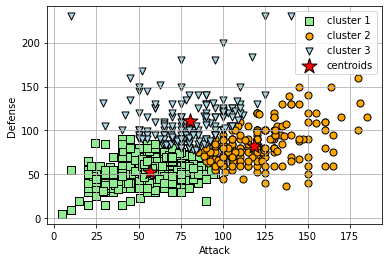

In [47]:
# Plotting the groups
plt.scatter(
    numerical_data[y_km == 0, 0], numerical_data[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    numerical_data[y_km == 1, 0], numerical_data[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    numerical_data[y_km == 2, 0], numerical_data[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# Plotting the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()